In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [7]:
class Bandit:

    def __init__(self, eps=0., initial=0., step_size=0.1, UCB_param=False):
        self.k = 10
        self.step_size = step_size
        self.indices = np.arange(self.k)
        self.time = 0
        self.average_reward = 0
        self.eps = eps
        self.initial = initial
        self.UCB_param = UCB_param

    def choose_action_ucb(self):
        UCB_estimation = self.q_est + self.UCB_param * np.sqrt(np.log(self.time + 1) / (self.action_count + 1e-5))
        q_best = np.max(UCB_estimation)
        return np.random.choice(np.where(UCB_estimation == q_best)[0])
        
    def choose_action_egreedy(self):
        if np.random.rand() < self.eps:
            return np.random.choice(self.indices)

        q_best = np.max(self.q_est)

        return np.random.choice(np.where(self.q_est == q_best)[0])

    # take an action, update estimation for this action
    def update_action_value(self, action):
        # generate the reward under N(real reward, 1)
        reward = np.random.randn() + self.q_true[action]
        self.time += 1
        self.action_count[action] += 1
        self.average_reward += (reward - self.average_reward) / self.time

        self.q_est[action] += self.step_size * (reward - self.q_est[action])
        return reward


In [10]:
def stationary(iterations, time, bandits):
    rewards = np.zeros((3, iterations, time))
    num_best_action = np.zeros(rewards.shape)
    
    for i, bandit in enumerate(bandits):
        
        print("Bandit ",i)
        
        for r in range(iterations):
            if r %100==0:
                print("Iteration: ", r)
            bandit.q_true = np.random.randn(10) + np.random.normal(loc=0.0, scale=0.01)
            bandit.q_est = np.zeros(10) + bandit.initial
            bandit.action_count = np.zeros(10)
            bandit.best_action = np.argmax(bandit.q_true)
            bandit.time = 0
            
            for t in range(time):
                if bandit.UCB_param==None:
                    action = bandit.choose_action_egreedy()
                else:
                    action = bandit.choose_action_ucb()
                reward = bandit.update_action_value(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    num_best_action[i, r, t] = 1

    return num_best_action.mean(axis=1)


def non_stationary(iterations, time, bandits):
    rewards = np.zeros((3, iterations, time))
    num_best_action = np.zeros(rewards.shape)
    
    for i, bandit in enumerate(bandits):
        
        print("Bandit ",i)
        bandit.q_true = np.random.randn(10)
        for r in range(iterations):
            if r %100==0:
                print("Iteration: ", r)

            bandit.q_est = np.zeros(10) + bandit.initial
            bandit.action_count = np.zeros(10)
            bandit.best_action = np.argmax(bandit.q_true)
            bandit.time = 0
            
            for t in range(time):
                if bandit.UCB_param==None:
                    action = bandit.choose_action_egreedy()
                else:
                    action = bandit.choose_action_ucb()
                reward = bandit.update_action_value(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    num_best_action[i, r, t] = 1

    return num_best_action.mean(axis=1)



# Stationary

Bandit  0
Iteration:  0
Iteration:  100
Iteration:  200
Iteration:  300
Iteration:  400
Bandit  1
Iteration:  0
Iteration:  100
Iteration:  200
Iteration:  300
Iteration:  400
Bandit  2
Iteration:  0
Iteration:  100
Iteration:  200
Iteration:  300
Iteration:  400


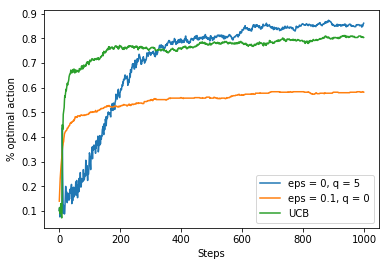

In [15]:
iterations, time= 500, 1000
bandits = []
bandits.append(Bandit(eps=0, initial=5, step_size=0.1))
bandits.append(Bandit(eps=0.1, initial=0, step_size=0.1))
bandits.append(Bandit(UCB_param=0.3))
num_best_action = stationary(iterations, time, bandits)

plt.plot(num_best_action[0], label='eps = 0, q = 5')
plt.plot(num_best_action[1], label='eps = 0.1, q = 0')
plt.plot(num_best_action[2], label='UCB')
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()

# Non-Stationary

Bandit  0
Iteration:  0
Iteration:  100
Iteration:  200
Iteration:  300
Iteration:  400
Bandit  1
Iteration:  0
Iteration:  100
Iteration:  200
Iteration:  300
Iteration:  400
Bandit  2
Iteration:  0
Iteration:  100
Iteration:  200
Iteration:  300
Iteration:  400


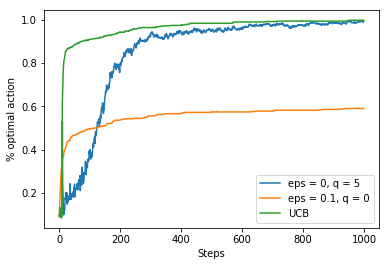

In [14]:
iterations, time= 500, 1000
bandits = [Bandit(eps=0, initial=5, step_size=0.1), Bandit(eps=0.1, initial=0, step_size=0.1), Bandit(UCB_param=0.3)]
num_best_action = non_stationary(iterations, time, bandits)

plt.plot(num_best_action[0], label='eps = 0, q = 5')
plt.plot(num_best_action[1], label='eps = 0.1, q = 0')
plt.plot(num_best_action[2], label='UCB')
plt.xlabel('Steps')
plt.ylabel('% optimal action')
plt.legend()